Exxercícios

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme. 
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
df_filmes = pd.read_csv('Database/movies.csv', sep='|', names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre'])
colunas = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

df_filmes[colunas] = df_filmes[colunas].replace('?', np.nan)
df_filmes['num_critic_for_reviews'] = pd.to_numeric(df_filmes['num_critic_for_reviews'], errors='coerce')
df_filmes['duration'] = pd.to_numeric(df_filmes['duration'], errors='coerce')
df_filmes['gross'] = pd.to_numeric(df_filmes['gross'], errors='coerce')
df_filmes['num_user_for_reviews'] = pd.to_numeric(df_filmes['num_user_for_reviews'], errors='coerce')
df_filmes['budget'] = df_filmes['budget'].str.replace(',', '').astype(float, errors='ignore')
df_filmes['title_year'] = pd.to_numeric(df_filmes['title_year'], errors='coerce')

df_filmes.head()

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,300000000.0,2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,245000000.0,2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action
4,NaN,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,7.1,Documentary


In [29]:
#1
df_filmes['profit'] = df_filmes['gross'] - df_filmes['budget']
info_maior_lucro = df_filmes.loc[df_filmes['profit'].idxmax()]
filme_com_maior_lucro = info_maior_lucro['movie_title'].strip()
lucro_do_filme = info_maior_lucro['profit']


print(f'Filme com maior lucro: {filme_com_maior_lucro}, com um lucro de ${lucro_do_filme:.2f}')

Filme com maior lucro: Avatar, com um lucro de $523505847.00


In [30]:
#2
info_maior_preju = df_filmes.loc[df_filmes['profit'].idxmin()]
filme_com_maior_preju = info_maior_preju['movie_title'].strip()
preju_do_filme = info_maior_preju['profit']


print(f'Filme com maior prejuízo: {filme_com_maior_preju}, com um prejuízo de ${preju_do_filme:.2f}')

Filme com maior prejuízo: John Carter, com um prejuízo de $-190641321.00


Text(0.5, 1.0, 'Distribuição do Ano e Budget do filme')

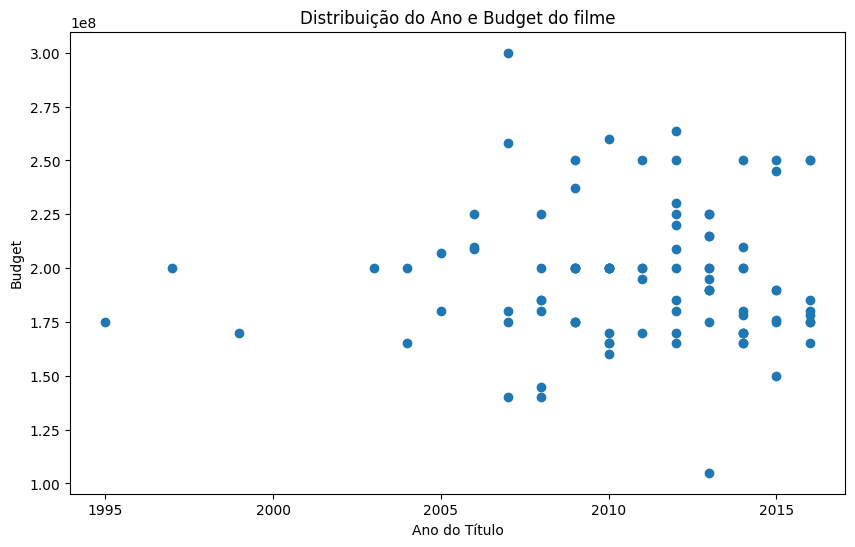

In [31]:
#3
grafico_budgetxyear = df_filmes.dropna(subset=['budget', 'title_year'])

plt.figure(figsize=(10, 6))

plt.scatter(x='title_year', y='budget', data=grafico_budgetxyear)

plt.xlabel('Ano do Título')
plt.ylabel('Budget')
plt.title('Distribuição do Ano e Budget do filme')

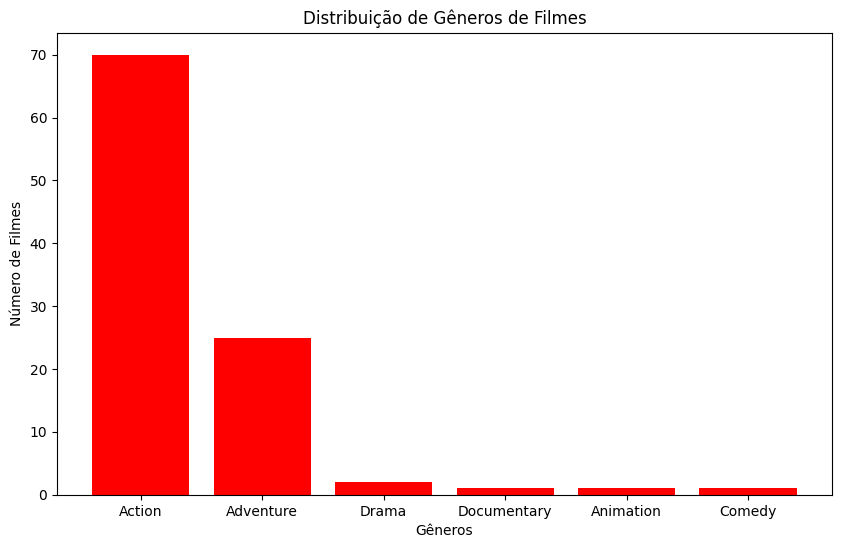

In [32]:
#4
grafico_generoxquantidade = df_filmes['genre'].value_counts().reset_index()
grafico_generoxquantidade.columns = ['genre', 'quantidade_filmes']

plt.figure(figsize=(10, 6))

plt.bar(grafico_generoxquantidade['genre'], grafico_generoxquantidade['quantidade_filmes'], color='red')
plt.xlabel('Gêneros')
plt.ylabel('Número de Filmes')
plt.title('Distribuição de Gêneros de Filmes')
plt.show()

In [33]:
#5
top_10_filmes = df_filmes.sort_values(by='imdb_score', ascending=False).head(10)

print(top_10_filmes[['movie_title', 'director_name', 'title_year', 'imdb_score']])

                    movie_title      director_name  title_year  imdb_score
66             The Dark Knight   Christopher Nolan      2008.0         9.0
97                   Inception   Christopher Nolan      2010.0         8.8
96                Interstellar   Christopher Nolan      2014.0         8.6
3        The Dark Knight Rises   Christopher Nolan      2012.0         8.5
58                      WALL·E      Andrew Stanton      2008.0         8.4
78                  Inside Out         Pete Docter      2015.0         8.3
67                          Up         Pete Docter      2009.0         8.3
43                 Toy Story 3         Lee Unkrich      2010.0         8.3
27  Captain America: Civil War       Anthony Russo      2016.0         8.2
93    How to Train Your Dragon        Dean DeBlois      2010.0         8.2


In [34]:
#6
media_por_genero = df_filmes.groupby('genre')['profit'].mean()
genero_mais_popular = media_por_genero.idxmax()
genero_menos_popular = media_por_genero.idxmin()

print(f'Gênero mais popular é de {genero_mais_popular}')
print(f'Gênero menos popular é de {genero_menos_popular}')

Gênero mais popular é de Drama
Gênero menos popular é de Comedy


Text(0.5, 1.0, 'Distribuição da Pontuação em relação ao Budget do filme')

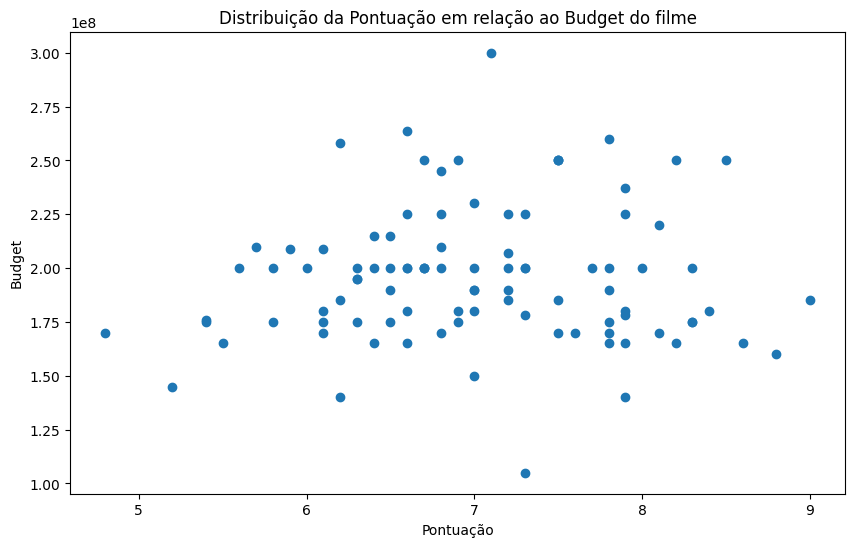

In [35]:
#7
grafico_scorexbudget = df_filmes.dropna(subset=['imdb_score', 'budget'])

plt.figure(figsize=(10, 6))

plt.scatter(x='imdb_score', y='budget', data=grafico_scorexbudget)

plt.xlabel('Pontuação')
plt.ylabel('Budget')
plt.title('Distribuição da Pontuação em relação ao Budget do filme')

In [36]:
#8
media_por_score = df_filmes.groupby('director_name')['imdb_score'].mean()
media_por_budget = df_filmes.groupby('director_name')['budget'].mean()

melhor_diretor = media_por_score.idxmax()
budget_melhor_diretor = media_por_budget[melhor_diretor]

diretor_maior_budget = media_por_budget.idxmax()
maior_budget = media_por_budget.max()

print(f'Melhor diretor é do {melhor_diretor} e o seu budget de ${budget_melhor_diretor}')
print(f'O maior budget é do {diretor_maior_budget} e seu budget foi de ${maior_budget}')
print('Logo a relação não faz sentido! Maior budget não significa maior budget')

Melhor diretor é do Christopher Nolan e o seu budget de $190000000.0
O maior budget é do Nathan Greno e seu budget foi de $260000000.0
Logo a relação não faz sentido! Maior budget não significa maior budget


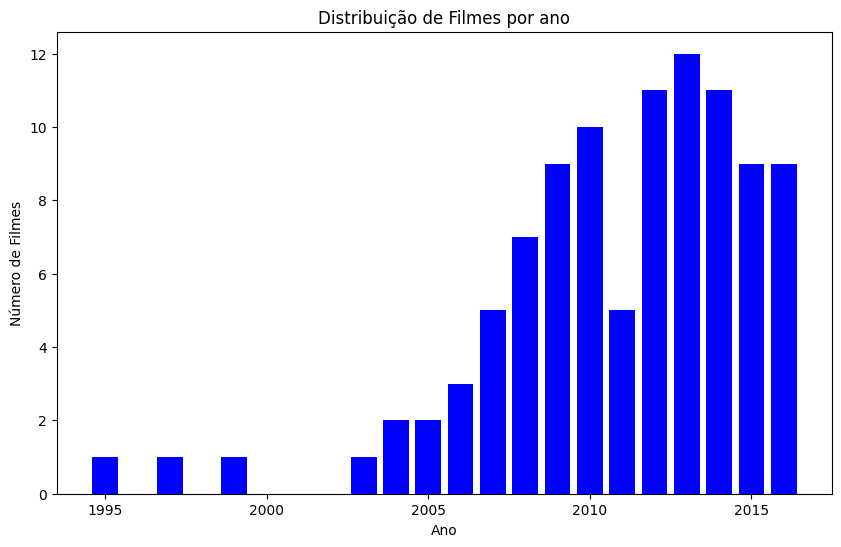

In [37]:
#9
grafico_anoxfilmes = df_filmes['title_year'].value_counts().reset_index()
grafico_anoxfilmes.columns = ['title_year', 'quantidade_filmes']

plt.figure(figsize=(10, 6))

plt.bar(grafico_anoxfilmes['title_year'], grafico_anoxfilmes['quantidade_filmes'], color='blue')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.title('Distribuição de Filmes por ano')
plt.show()